In [18]:
import numpy as np
import audioflux as af
from audioflux.type import SpectralFilterBankScaleType, SpectralDataType
import torch
import matplotlib.pyplot as plt
from audioflux.display import fill_spec

In [19]:
similarity = torch.nn.CosineSimilarity(dim=-1)

### 同一个人同一句话

In [20]:
# Read audio data and sample rate
audio_arr1, sr1 = af.read("tests/samples/my_test/4.wav")

# Create BFT object and extract mel spectrogram
bft_obj1 = af.BFT(num=128, radix2_exp=12, samplate=sr1,
                 scale_type=SpectralFilterBankScaleType.MEL,
                 data_type=SpectralDataType.POWER)
spec_arr1 = bft_obj1.bft(audio_arr1)
spec_arr1 = np.abs(spec_arr1)

# Create XXCC object and extract mfcc
xxcc_obj1 = af.XXCC(bft_obj1.num)
xxcc_obj1.set_time_length(time_length=spec_arr1.shape[-1])
mfcc_arr1 = xxcc_obj1.xxcc(spec_arr1,cc_num=40)
h,w1 = mfcc_arr1.shape
print(mfcc_arr1.shape)

(40, 145)


In [21]:
audio_arr2, sr2 = af.read("tests/samples/my_test/5.wav")

# Create BFT object and extract mel spectrogram
bft_obj2 = af.BFT(num=128, radix2_exp=12, samplate=sr2,
                 scale_type=SpectralFilterBankScaleType.MEL,
                 data_type=SpectralDataType.POWER)
spec_arr2 = bft_obj2.bft(audio_arr2)
spec_arr2 = np.abs(spec_arr2)

# Create XXCC object and extract mfcc
xxcc_obj2 = af.XXCC(bft_obj2.num)
xxcc_obj2.set_time_length(time_length=spec_arr2.shape[-1])
mfcc_arr2 = xxcc_obj2.xxcc(spec_arr2,cc_num=40)
h,w2 = mfcc_arr2.shape
print(mfcc_arr2.shape)

(40, 148)


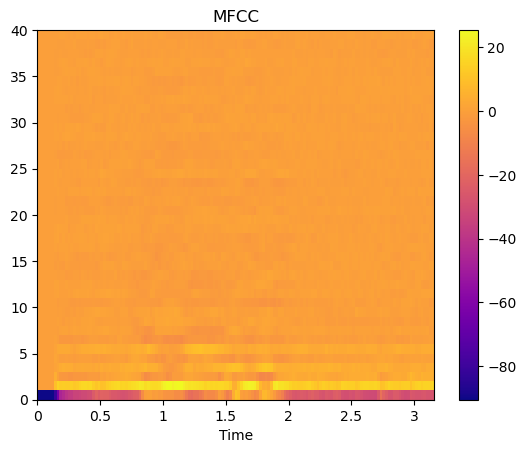

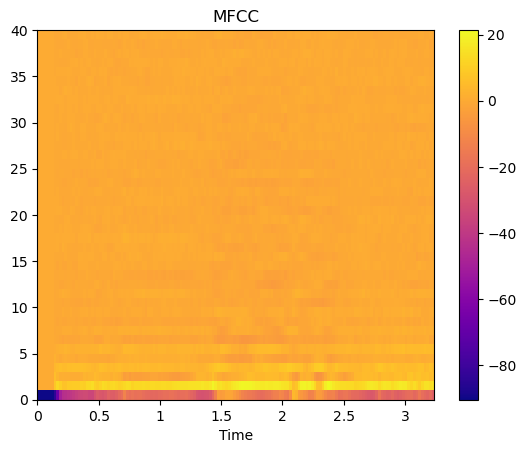

In [22]:
audio_len = audio_arr1.shape[-1]
fig, ax = plt.subplots()
img = fill_spec(mfcc_arr1, axes=ax,
          x_coords=bft_obj1.x_coords(audio_len), x_axis='time',
          title='MFCC')
fig.colorbar(img, ax=ax)

audio_len = audio_arr2.shape[-1]
fig, ax = plt.subplots()
img = fill_spec(mfcc_arr2, axes=ax,
          x_coords=bft_obj2.x_coords(audio_len), x_axis='time',
          title='MFCC')
fig.colorbar(img, ax=ax)



In [23]:
if w1>w2:
    w = w2
    mfcc_arr1 = np.resize(mfcc_arr1,(h,w2))
elif w1<w2:
    w = w1
    mfcc_arr2 = np.resize(mfcc_arr2,(h,w1))
    
score = similarity(torch.tensor(mfcc_arr1.reshape(h*w)), torch.tensor(mfcc_arr2.reshape(h*w)))
print(f"Eembeddings Score: {score}")

Eembeddings Score: 0.8791810870170593


### 同一个人不同话

In [8]:
audio_arr3, sr3 = af.read("tests/samples/ASR/spk1_snt1.wav")

# Create BFT object and extract mel spectrogram
bft_obj3 = af.BFT(num=128, radix2_exp=12, samplate=sr3,
                 scale_type=SpectralFilterBankScaleType.MEL,
                 data_type=SpectralDataType.POWER)
spec_arr3 = bft_obj3.bft(audio_arr3)
spec_arr3 = np.abs(spec_arr3)

# Create XXCC object and extract mfcc
xxcc_obj3 = af.XXCC(bft_obj3.num)
xxcc_obj3.set_time_length(time_length=spec_arr3.shape[-1])
mfcc_arr3 = xxcc_obj3.xxcc(spec_arr3,cc_num=40)
h,w3 = mfcc_arr3.shape

In [9]:
audio_arr4, sr4 = af.read("tests/samples/ASR/spk1_snt2.wav")

# Create BFT object and extract mel spectrogram
bft_obj4 = af.BFT(num=128, radix2_exp=12, samplate=sr4,
                 scale_type=SpectralFilterBankScaleType.MEL,
                 data_type=SpectralDataType.POWER)
spec_arr4 = bft_obj4.bft(audio_arr4)
spec_arr4 = np.abs(spec_arr4)

# Create XXCC object and extract mfcc
xxcc_obj4 = af.XXCC(bft_obj4.num)
xxcc_obj4.set_time_length(time_length=spec_arr4.shape[-1])
mfcc_arr4 = xxcc_obj4.xxcc(spec_arr4,cc_num=40)
h,w4 = mfcc_arr4.shape

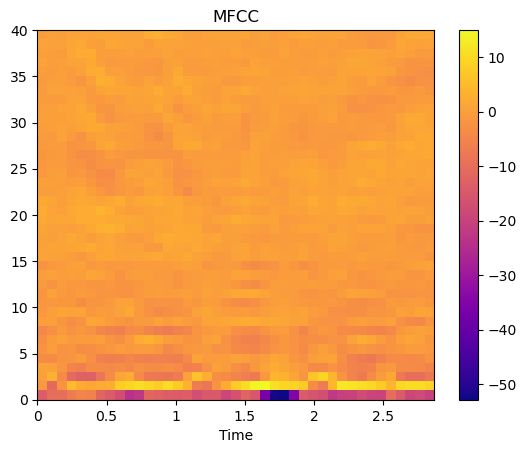

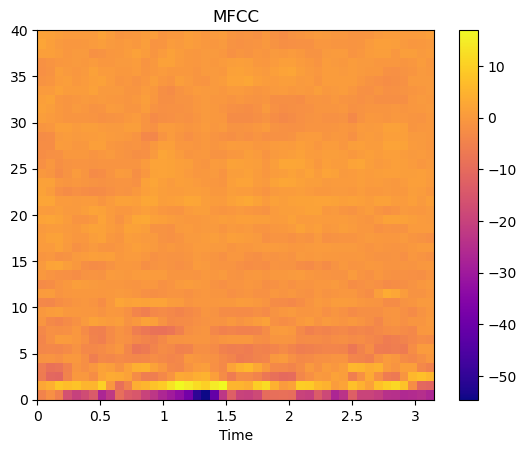

In [10]:
audio_len = audio_arr3.shape[-1]
fig, ax = plt.subplots()
img = fill_spec(mfcc_arr3, axes=ax,
          x_coords=bft_obj3.x_coords(audio_len), x_axis='time',
          title='MFCC')
fig.colorbar(img, ax=ax)

audio_len = audio_arr4.shape[-1]
fig, ax = plt.subplots()
img = fill_spec(mfcc_arr4, axes=ax,
          x_coords=bft_obj4.x_coords(audio_len), x_axis='time',
          title='MFCC')
fig.colorbar(img, ax=ax)

In [11]:
if w3>w4:
    w = w4
    mfcc_arr3 = np.resize(mfcc_arr3,(h,w4))
elif w3<w4:
    w = w3
    mfcc_arr4 = np.resize(mfcc_arr4,(h,w3))
    
score = similarity(torch.tensor(mfcc_arr3.reshape(h*w)), torch.tensor(mfcc_arr4.reshape(h*w)))
print(f"Eembeddings Score: {score}")

Eembeddings Score: 0.6134953498840332


### 不同人同一句话

In [13]:
audio_arr5, sr5 = af.read("tests/samples/my_test/3.wav")

# Create BFT object and extract mel spectrogram
bft_obj5 = af.BFT(num=128, radix2_exp=12, samplate=sr5,
                 scale_type=SpectralFilterBankScaleType.MEL,
                 data_type=SpectralDataType.POWER)
spec_arr5 = bft_obj5.bft(audio_arr5)
spec_arr5 = np.abs(spec_arr5)

# Create XXCC object and extract mfcc
xxcc_obj5 = af.XXCC(bft_obj5.num)
xxcc_obj5.set_time_length(time_length=spec_arr5.shape[-1])
mfcc_arr5 = xxcc_obj5.xxcc(spec_arr5,cc_num=40)
h,w5 = mfcc_arr5.shape

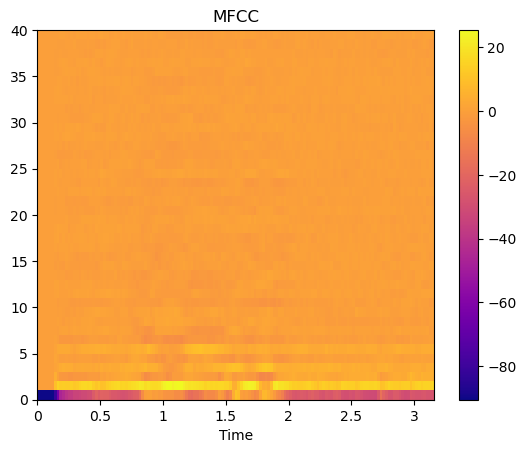

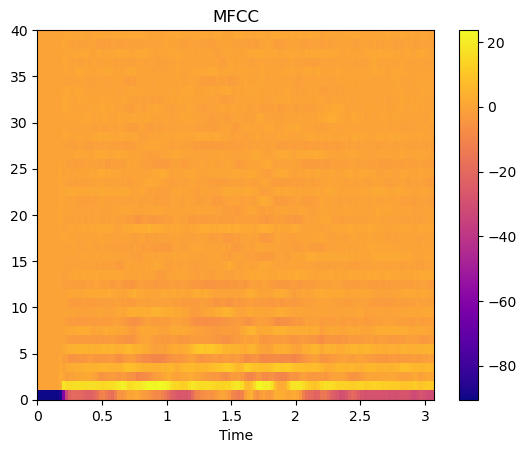

In [16]:
audio_len = audio_arr1.shape[-1]
fig, ax = plt.subplots()
img = fill_spec(mfcc_arr1, axes=ax,
          x_coords=bft_obj1.x_coords(audio_len), x_axis='time',
          title='MFCC')
fig.colorbar(img, ax=ax)

audio_len = audio_arr5.shape[-1]
fig, ax = plt.subplots()
img = fill_spec(mfcc_arr5, axes=ax,
          x_coords=bft_obj5.x_coords(audio_len), x_axis='time',
          title='MFCC')
fig.colorbar(img, ax=ax)

In [17]:
if w1>w5:
    w = w5
    mfcc_arr1 = np.resize(mfcc_arr1,(h,w5))
elif w1<w3:
    w = w1
    mfcc_arr5 = np.resize(mfcc_arr5,(h,w1))
    
score = similarity(torch.tensor(mfcc_arr1.reshape(h*w)), torch.tensor(mfcc_arr5.reshape(h*w)))
print(f"Eembeddings Score: {score}")

Eembeddings Score: 0.7579331994056702


### 不同人不同话

In [12]:
if w1>w3:
    w = w3
    mfcc_arr1 = np.resize(mfcc_arr1,(h,w3))
elif w1<w3:
    w = w1
    mfcc_arr3 = np.resize(mfcc_arr3,(h,w1))
    
score = similarity(torch.tensor(mfcc_arr1.reshape(h*w)), torch.tensor(mfcc_arr3.reshape(h*w)))
print(f"Eembeddings Score: {score}")

Eembeddings Score: 0.32631608843803406
